importing libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

specifying Times New Roman font and to force that withing plotting commands

In [31]:
tnr = "Times New Roman"
plt.rcParams['font.sans-serif'] = tnr
plt.rcParams['font.family'] = tnr
params ={'mathtext.default':'regular'}          
plt.rcParams.update(params)

uploading input files

In [32]:
ObsID = 'cycle19'
file = 'Fe XVII_15.01'
wavelength = '15.014'
data = np.genfromtxt(file.replace(" ", "")+'_Cstats.txt')

#data = np.genfromtxt('0095810401_6T_CNONe_5-37_HEII_xspec.txt')

makes a user's choice to plot u0 or tau

if plotting u0 or R0, type 0

if plotting tau, type 1

In [33]:
userinput1 = 1
assert(userinput1 == 0 or userinput1 == 1)

if userinput1 = 0, makes another user's choice to plot u0 or R0

if plotting u0, type 0

if plotting R0, type 1

In [34]:
userinput2 = 0
assert(userinput2 == 0 or userinput2 == 1)

In [35]:
def CtoP(Cstats):
    """takes a list of Cstatistics, convert each element to probability ane returns a list"""
    scaling_factor = 0
    while np.exp(-(Cstats[0]-scaling_factor)/2) == 0.0:
        scaling_factor += 3000
    P = []
    for i in Cstats:
        P.append(np.exp(-(i-scaling_factor)/2))
    return P

def reduceList(l):
    """takes a list and reduce it so that each number of the list only appears once, returns a list"""
    newl = []
    for i in range(len(l)):
        if l[i] not in newl:
            newl.append(l[i])
    return newl

def findBin(l):
    """takes a list l and calculate the half bin width of each element in the list, returns a list with twice the size"""
    binlist = []
    for i in range(len(l)-1):
        binvalue = (l[i+1]-l[i])/2
        binlist.append(binvalue)
        binlist.append(binvalue)
    binlist.insert(0, binlist[0])
    binlist.append(binlist[-1])
    return binlist

def listofSums(prob, list1, bin1, list2, bin2):
    """takes three lists, sums up the product of prob and bin2 for every identical element in list1, returns a list of sums"""
    """also returns the total probability as a number"""
    assert(len(prob) == len(list1))
    assert(len(list1) == len(list2))
    assert(len(bin2) == 2*len(reduceList(list2)))
    reducelist1 = reduceList(list1)
    reducelist2 = reduceList(list2)
    listlen = len(reducelist1)
    returnlist = [0]*listlen
    for i in range(len(list1)):
        reducelist2index = reducelist2.index(list2[i])
        binrange = bin2[reducelist2index*2]+bin2[reducelist2index*2+1]
        localprob = prob[i]*binrange
        for j in range(listlen):
            if list1[i] == reducelist1[j]:
                returnlist[j] += localprob
    Psum = 0
    for i in range(len(returnlist)):
        localprob = returnlist[i]*(bin1[i*2]+bin1[i*2+1])
        Psum += localprob
    return returnlist, Psum

def normalizeList(l, s):
    """normalizes elements in a list by a number s and returns the normalized list"""
    returnlist = []
    for i in l:
        returnlist.append(i/s)
    return returnlist

def Pu0toPR0(Pu0, u0):
    """convert Pu0 to PR0"""
    returnlist = []
    for i in range(len(Pu0)):
        returnlist.append(Pu0[i]*(u0[i]**2))
    return returnlist

def makeHist(x, xbin, y):
    """takes three lists and plots a histogram"""
    assert(len(x) == len(y))
    assert(2*len(x) == len(xbin))
    xvalues = []
    yvalues = []
    for i in range(len(x)):
        xvalues.append(x[i]-xbin[i*2])
        xvalues.append(x[i]+xbin[i*2])
        yvalues.append(y[i])
        yvalues.append(y[i])
    return xvalues, yvalues

In [62]:
def plotHist(x, y):
    """takes two lists of values and plots in the designed format"""
    plt.figure(figsize = (10, 8))
    if userinput1 == 0:
        if userinput2 == 0:
            xlabel = r'$u_0$'
            xfile = 'u0'
            x = x[:-1]
            y = y[:-1]
        elif userinput2 == 1:
            xlabel = r'$R_0$'
            xfile = 'R0'
            x = x[:-1]
            y = y[:-1]
    elif userinput1 == 1:
        xlabel = r'$\tau_\ast$'
        xfile = 'tau'
    maxindex = y.index(max(y))
    assert(y[maxindex] == y[maxindex+1])
    xmax = x[maxindex] + (x[maxindex+1]-x[maxindex])/2
    plt.xlabel(xlabel, fontsize = 27.5)
    #plt.ylabel(r'$P$ %s' % xlabel, fontsize = 27.5)
    plt.ylabel(r'$P_{\tau_\ast}$', fontsize = 27.5)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.locator_params(nbins=6)
    if np.max(x) > 50: # for u0 going to 0.01
        plt.xlim(right = 10)
    plt.plot(x, y, color = 'k', linewidth = 2)
    #plt.figtext(0.15,0.83, 'ObsID: '+str(ObsID), fontsize = 23)
    #plt.figtext(0.15,0.75, r'$\lambda$ = '+wavelength+' Å ,  '+file.split("_")[0], fontsize = 23)
    #plt.figtext(0.15,0.67, r'max %s = %.2f' % (xlabel, xmax), fontsize = 23)
    plt.savefig(file.replace(" ", "")+'_Cstats_'+xfile+'_640.png', bbox_inches = 'tight')
    plt.show()
    
def writeProb(x, y):
    """takes two lists and writes them into a txt file"""
    if userinput1 == 0:
        if userinput2 == 0:
            xfile = 'u0'
        elif userinput2 == 1:
            xfile = 'R0'
    elif userinput1 == 1:
        xfile = 'tau'
    txt = open (file.replace(" ", "")+'_Cstats_'+xfile+'.txt', 'w')
    for i in range(len(x)):
        txt.write(str(x[i])+' '+str(y[i])+'\n')

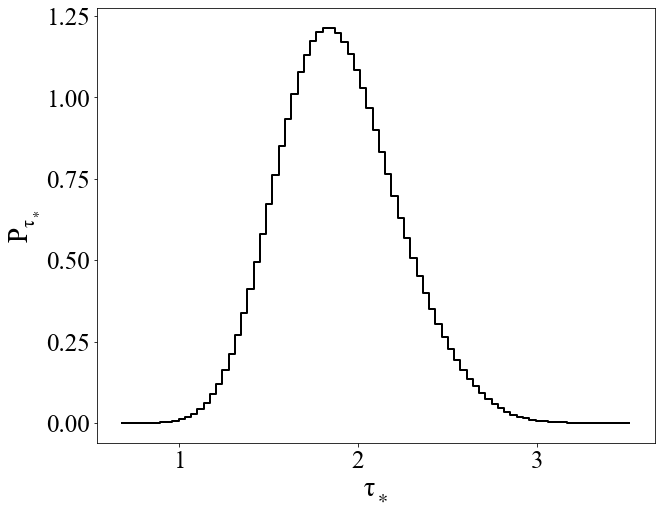

In [63]:
P = CtoP(data[:, 0])
taudata = data[:, 1]
u0data = data[:, 2]
R0data = 1/u0data

tau = reduceList(taudata)
taubin = findBin(tau)
u0 = reduceList(u0data)
u0bin = findBin(u0)
R0 = reduceList(R0data)
R0bin = findBin(R0)

Psum = listofSums(P, u0data, u0bin, taudata, taubin)[1]
assert(((listofSums(P, u0data, u0bin, taudata, taubin)[1]/listofSums(P, taudata, taubin, u0data, u0bin)[1])-1) <= 1.e-5)
Ptau_beforenormalized = listofSums(P, taudata, taubin, u0data, u0bin)[0]
Ptau = normalizeList(Ptau_beforenormalized, Psum)

Pu0_beforenormalized = listofSums(P, u0data, u0bin, taudata, taubin)[0]
Pu0 = normalizeList(Pu0_beforenormalized, Psum)
PR0 = Pu0toPR0(Pu0, u0)

if userinput1 == 0:
    if userinput2 == 0:
        x, y = makeHist(u0, u0bin, Pu0)
        txtx, txty = u0, Pu0
    elif userinput2 == 1:
        x, y = makeHist(R0, R0bin, PR0)
        txtx, txty = R0, PR0
elif userinput1 == 1:
    x, y = makeHist(tau, taubin, Ptau)
    txtx, txty = tau, Ptau

plotHist(x, y)
writeProb(txtx, txty)


added cell to plot probability distribution for sigma* in 6T model.

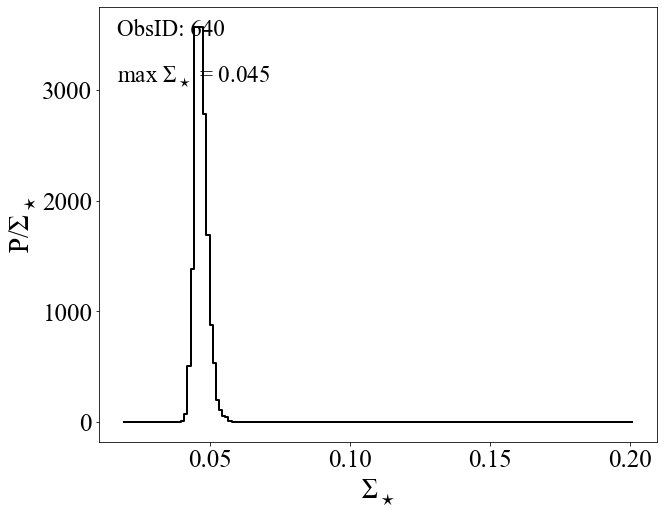

In [10]:
"""P_sigma = CtoP(data[:, 0])
sigmadata = data[:, 1]
sigma = reduceList(sigmadata)
sigmabin = findBin(sigma)

Psum_sigma = 0
for i in range(len(sigma)):
    Psum_sigma += sigma[i]*(sigmabin[2*i]+sigmabin[2*i+1])*P_sigma[i]
Psigma = normalizeList(P_sigma, Psum_sigma)

maxindex = Psigma.index(max(Psigma))

txt = open (file+'_sigma.txt', 'w')
for i in range(len(sigma)):
    txt.write(str(sigma[i])+' '+str(Psigma[i])+'\n')

plt.figure(figsize = (10, 8))
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.locator_params(nbins=6)
plt.plot(makeHist(sigma, sigmabin, Psigma)[0], makeHist(sigma, sigmabin, Psigma)[1], color = 'k', linewidth = 2)
plt.xlabel(r'$\Sigma_\star$', fontsize = 27.5)
plt.ylabel(r'$P/\Sigma_\star$', fontsize = 27.5)
plt.figtext(0.15,0.83, 'ObsID: 640', fontsize = 23)
plt.figtext(0.15,0.75, r'max %s = %.3f' % (r'$\Sigma_\star$', sigma[maxindex]), fontsize = 23)
plt.savefig('%s.png' % (file))"""